### Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


### Sklearn

In [78]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Models

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Metrics & Utilities

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings("ignore")

### Display Settings

In [9]:
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.05)
pd.set_option('display.max_columns', 200)

#### Load the Dataset

In [10]:
df = pd.read_csv("customer_data.csv")
print("Shape:", df.shape)
df.head()

Shape: (10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Initial inspection

In [11]:
display(df.info())
display(df.describe(include='all'). T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


#### Missing Values

In [12]:
print("\n Missing values per column:")
print(df.isnull().sum)

print("\n Churn value counts:")
print(df['churn'].value_counts(normalize=False))
print("\n Churn Proportion:")
print(df['churn'].value_counts(normalize=True))


 Missing values per column:
<bound method DataFrame.sum of       customer_id  credit_score  country  gender    age  tenure  balance  \
0           False         False    False   False  False   False    False   
1           False         False    False   False  False   False    False   
2           False         False    False   False  False   False    False   
3           False         False    False   False  False   False    False   
4           False         False    False   False  False   False    False   
...           ...           ...      ...     ...    ...     ...      ...   
9995        False         False    False   False  False   False    False   
9996        False         False    False   False  False   False    False   
9997        False         False    False   False  False   False    False   
9998        False         False    False   False  False   False    False   
9999        False         False    False   False  False   False    False   

      products_number  cred

### Exploratory Data Analysis (visualizations)

- distributions of numeric features, relationships with churn and categorical features.

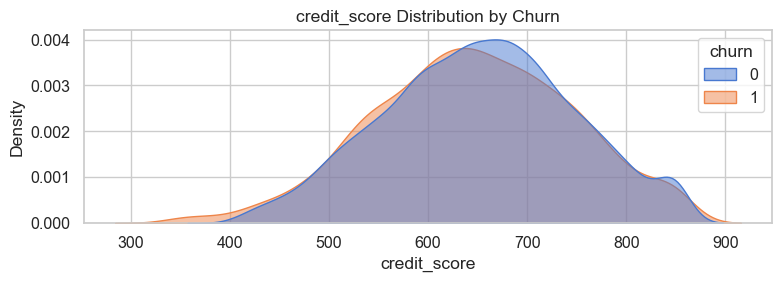

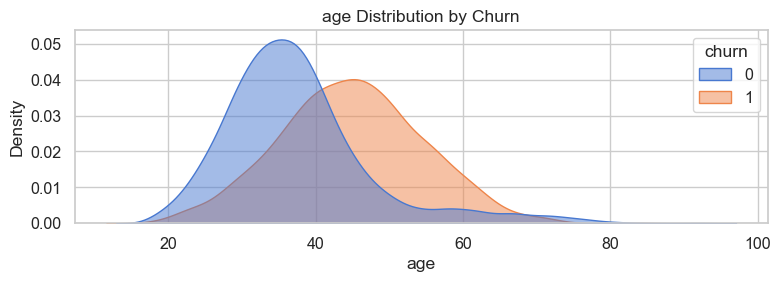

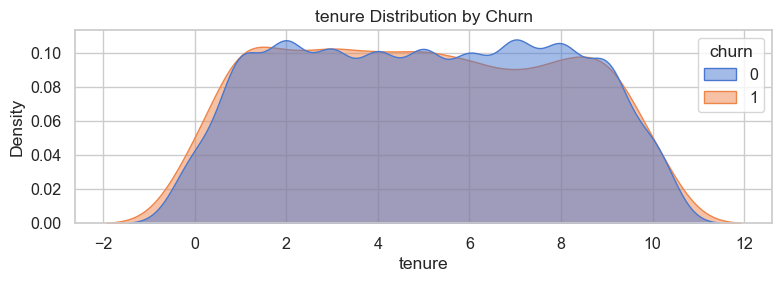

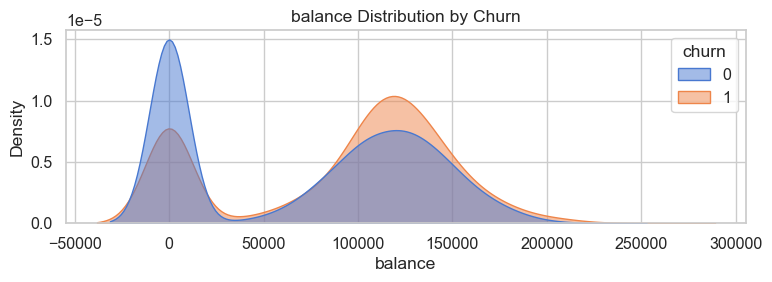

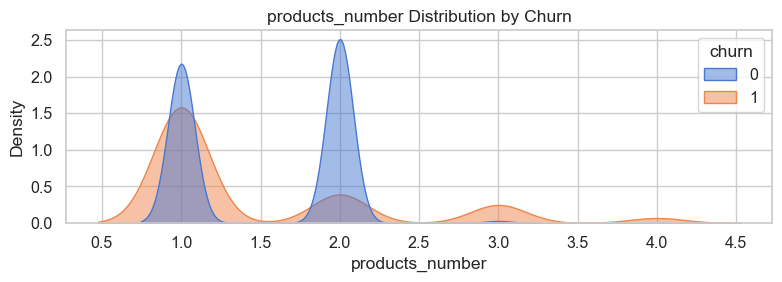

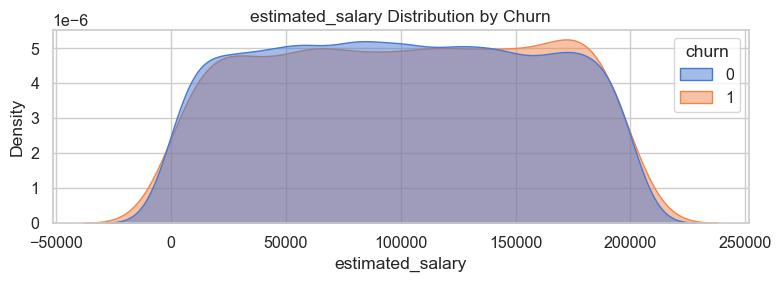

In [13]:
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

for col in num_cols:
    plt.figure(figsize = (8,3))
    sns.kdeplot(data=df, x=col, hue='churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'{col} Distribution by Churn')
    plt.tight_layout()
    plt.show()

#### Pairplot (sampled for speed)

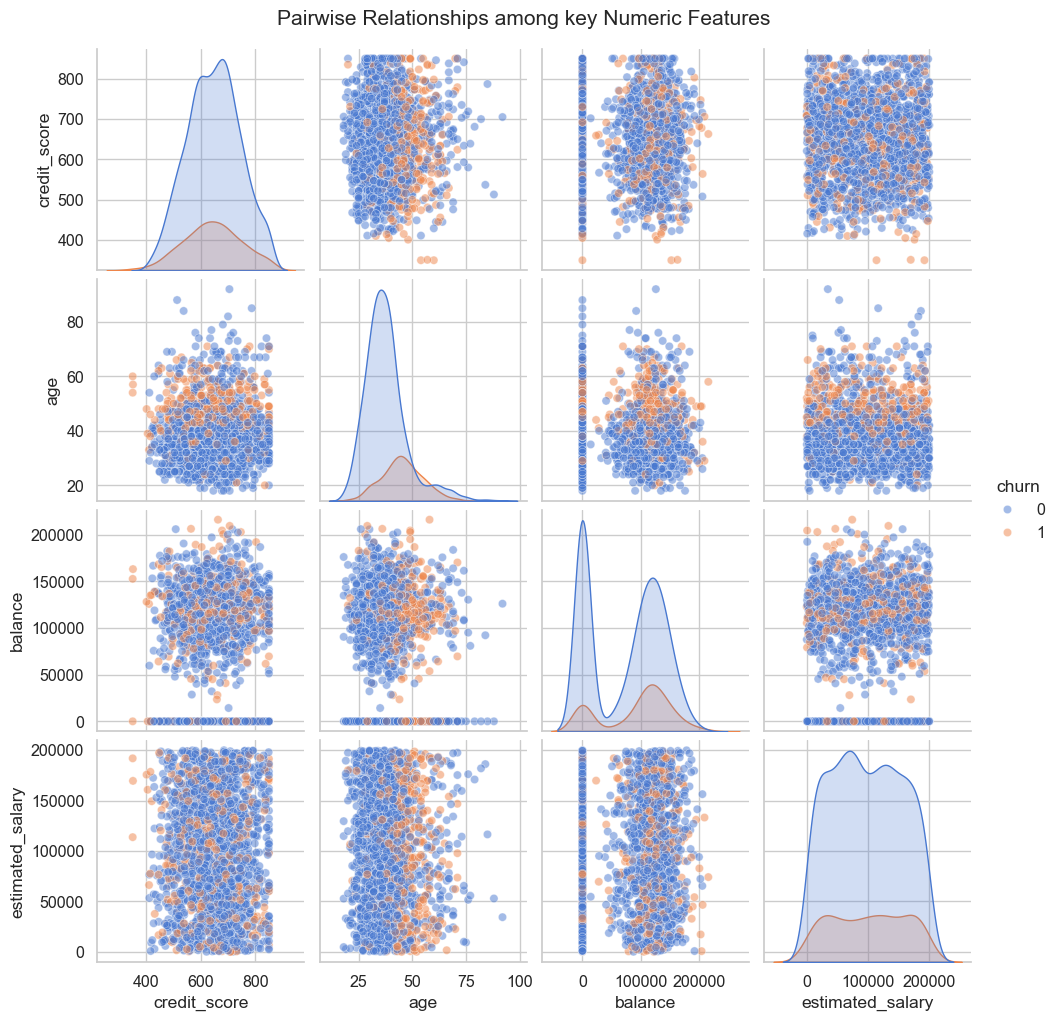

In [14]:
sns.pairplot(df.sample(frac=0.2, random_state=42),
            vars=['credit_score', 'age', 'balance', 'estimated_salary'],
            hue='churn', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships among key Numeric Features', y=1.02)
plt.show()

#### Violin plot for Age

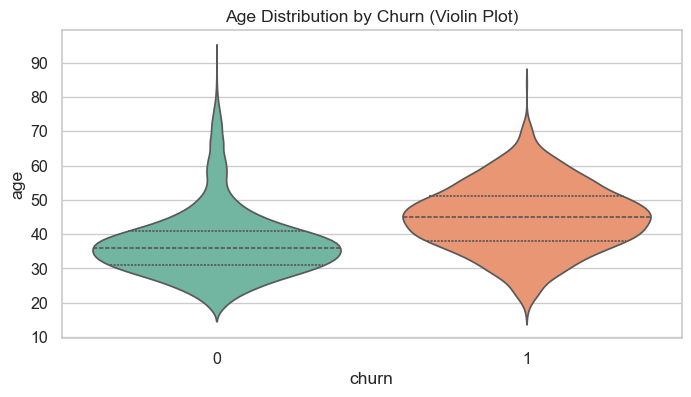

In [15]:
plt.figure(figsize=(8,4))
sns.violinplot(data=df, x='churn', y='age', inner='quart', palette='Set2')
plt.title('Age Distribution by Churn (Violin Plot)')
plt.show()

##### Tenure Distribution

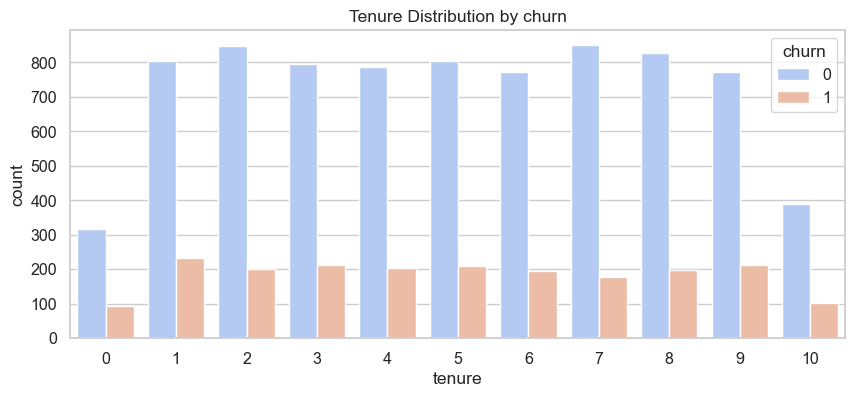

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='tenure', hue='churn', palette='coolwarm')
plt.title('Tenure Distribution by churn')
plt.show()

#### Gender vs Churn Donut Chart

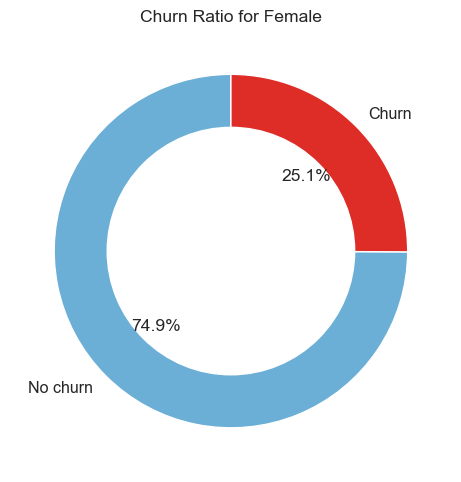

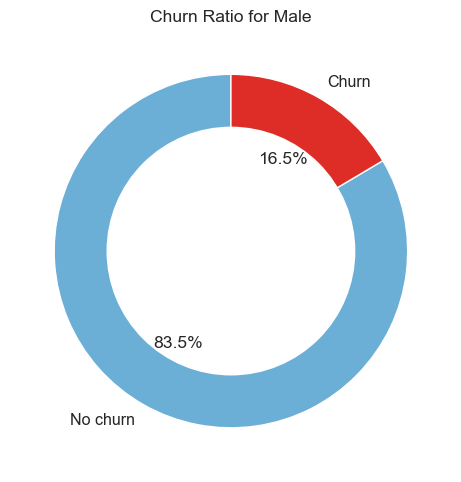

In [17]:
gender_counts = df.groupby('gender')['churn'].value_counts(normalize=True).unstack().fillna(0)
for gender in gender_counts.index:
    plt.figure(figsize=(5,5))
    plt.pie(gender_counts.loc[gender], labels=['No churn', 'Churn'],
           autopct='%1.1f%%', startangle=90, colors=['#6baed6', '#de2d26'])
    center = plt.Circle((0,0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center)
    plt.title(f'Churn Ratio for {gender}')
    plt.tight_layout()
    plt.show()

#### Categorical features

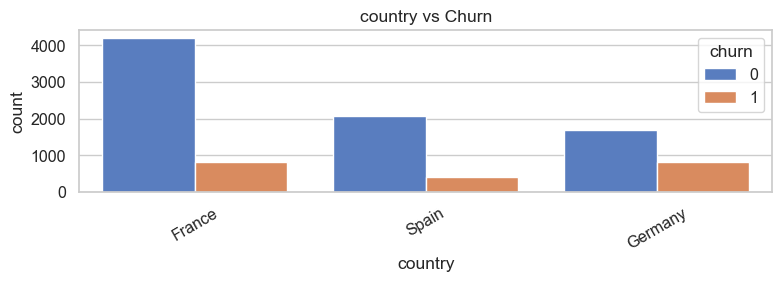

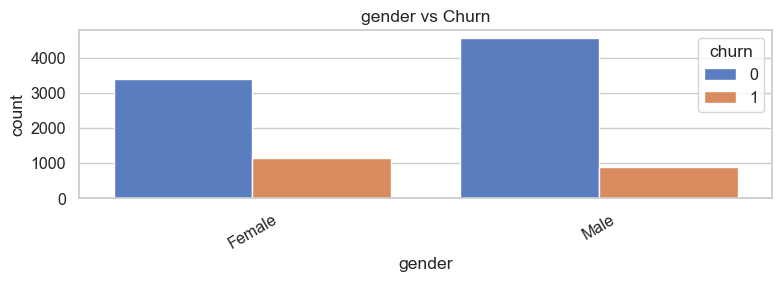

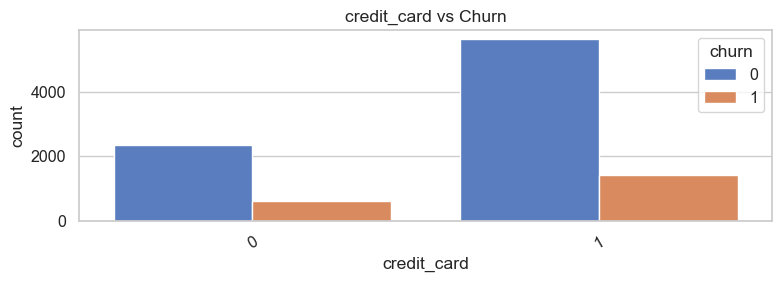

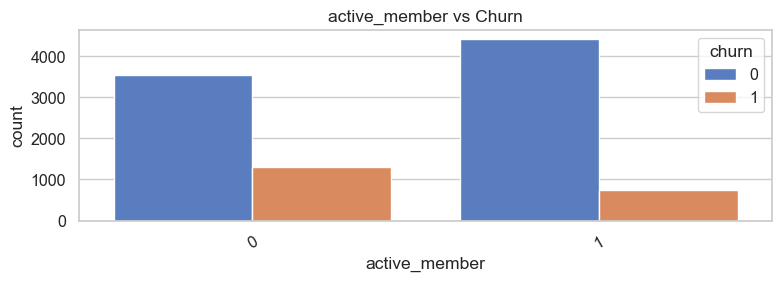

In [18]:
cat_cols = ['country', 'gender', 'credit_card', 'active_member']
for c in cat_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x=c, hue='churn')
    plt.title(f'{c} vs Churn')
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.show()

### Heatmap Visualization

In [20]:
corr = df.corr(numeric_only=True)

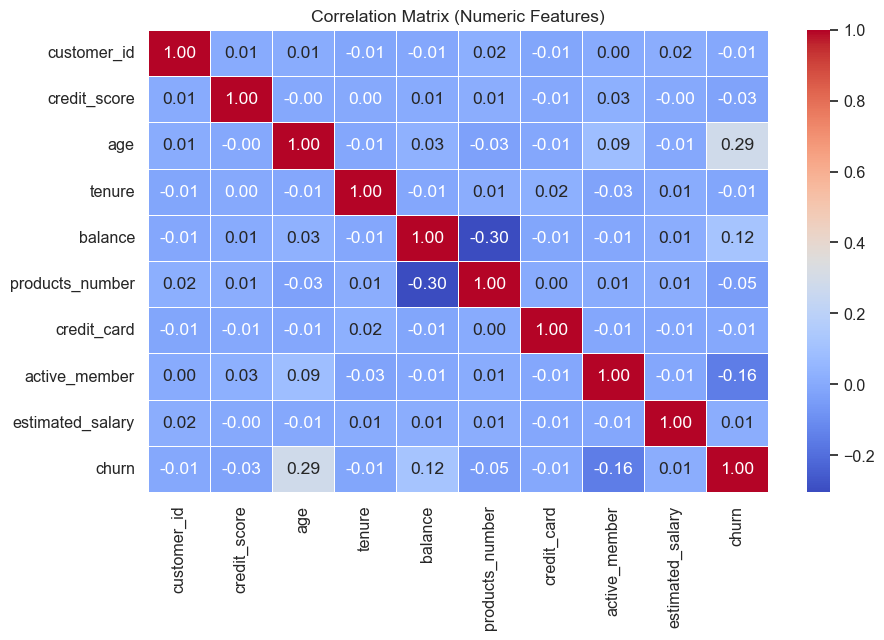

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

#### Numeric Correlation Heatmap

In [23]:
numeric_data = df[num_cols]  # use the numeric columns from your feature-engineered dataframe
corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,credit_score,age,tenure,balance,products_number,estimated_salary
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


#### Balance vs Products scatter

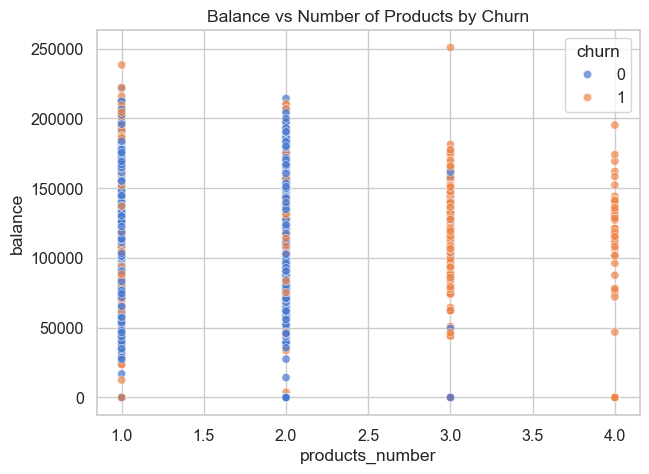

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='products_number', y='balance', hue='churn', alpha=0.7)
plt.title('Balance vs Number of Products by Churn')
plt.show()

#### Aggregate churn rate per number of products

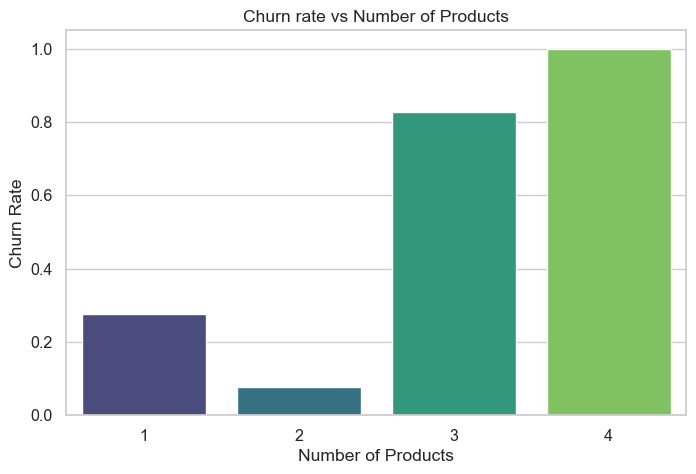

In [26]:
churn_rate = df.groupby('products_number')['churn'].mean().reset_index()

## plot churn rate 
plt.figure(figsize=(8,5))
sns.barplot(data=churn_rate, x='products_number', y='churn', palette='viridis')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.title('Churn rate vs Number of Products')
plt.show()

### Feature Engineering

- Create meaningful features: e.g. balance per product, age group, salary bracket and handle missing values.

In [27]:
df_fe = df.copy()    

# Balance per product
df_fe['balance_per_product'] = df_fe['balance'] / (df_fe['products_number'].replace(0, np.nan))
df_fe['balance_per_product'].fillna(0, inplace=True)

# Salary to balance ratio
df_fe['Salary_balance_ratio'] = df_fe['estimated_salary'] / (df_fe['balance'].replace(0, np.nan))
df_fe['Salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_fe['Salary_balance_ratio'].fillna(df_fe['Salary_balance_ratio'].median(), inplace=True)

#Age Group
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df_fe['age_group'] = pd.cut(df_fe['age'], bins=bins, labels= labels)

# Tenure bucket
df_fe['tenure_bucket'] = pd.cut(df_fe['tenure'], bins=[-1,0,2,5,10,100], labels=['0', '1-2', '3-5', '6-10', '10+'])

# Flag high Balance
df_fe['high_balance'] = (df_fe['balance'] > df_fe['balance'].quantile(0.75)).astype(int)

# Quick checks
df_fe[['balance_per_product','Salary_balance_ratio','age','age_group','tenure','tenure_bucket','high_balance']].head()

,balance_per_product,Salary_balance_ratio,age,age_group,tenure,tenure_bucket,high_balance
0,0.000000,0.839258,42,35-44,2,1-2,0
1,83807.860000,1.342864,41,35-44,1,1-2,0
2,53220.266667,0.713585,42,35-44,8,6-10,1
3,0.000000,0.839258,39,35-44,1,1-2,0
4,125510.820000,0.630098,43,35-44,2,1-2,0


### Preprocessing - encoding & scaling

##### Build pre-processing pipelines that encodes categorical features and scales numerical ones.

In [113]:
# Define features and target
target = 'churn'
drop_cols = ['customer_id']
features = [c for c in df_fe.columns if c not in [target] + drop_cols]

In [124]:
numeric_features = ['credit_score','age','tenure','balance','products_number','estimated_salary','balance_per_product','Salary_balance_ratio']
categorical_features = ['country','gender','credit_card','active_member','age_group','tenure_bucket','high_balance']

In [125]:
df_fe[categorical_features] = df_fe[categorical_features].astype('object')

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [126]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [127]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [128]:
print('Numeric features:', numeric_features)
print('Categorical features:', categorical_features)

Numeric features: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'balance_per_product', 'Salary_balance_ratio']
Categorical features: ['country', 'gender', 'credit_card', 'active_member', 'age_group', 'tenure_bucket', 'high_balance']


### Train Test split

In [129]:
X = df_fe[features]
y = df_fe[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)
print('Train churn proportion:', y_train.mean(), 'Test churn proportion:', y_test.mean())

Train shape: (8000, 15) Test shape: (2000, 15)
Train churn proportion: 0.20375 Test churn proportion: 0.2035


#### Train multiple models with pipeline and compare using cross-validation

In [130]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

In [131]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    results[name] = scores
    print(f"{name} AUC: Mean={scores.mean():.4f} std={scores.std():.4f}")

LogisticRegression AUC: Mean=0.7877 std=0.0244
RandomForest AUC: Mean=0.8486 std=0.0130
GradientBoosting AUC: Mean=0.8628 std=0.0097
AdaBoost AUC: Mean=0.8462 std=0.0133
SVC AUC: Mean=0.8351 std=0.0104


### Boxplot of CV AUC scores

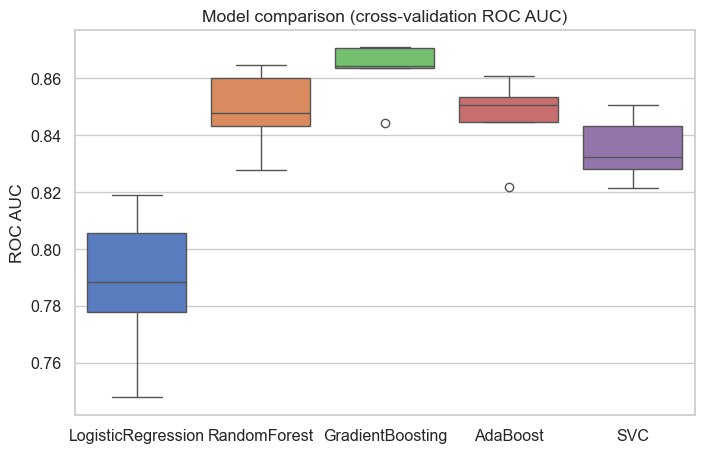

In [132]:
plt.figure(figsize=(8,5))
sns.boxplot(data=[results[m] for m in list(results.keys())])
plt.xticks(ticks=range(len(results)), labels=list(results.keys()))
plt.ylabel('ROC AUC')
plt.title('Model comparison (cross-validation ROC AUC)')
plt.show()

### Fit best model on full train set and evaluate on test set
- select best model by mean CV AUC above and evaluate standard metrics on the test set

In [133]:
# choose best model (automatic pick by mean AUC)
best_name = max(results.keys(), key=lambda k: results[k].mean())
best_name, results[best_name].mean()

('GradientBoosting', np.float64(0.8627777349731776))

Test Accuracy: 0.8680
Test Precision: 0.7804
Test Recall: 0.4889
Test F1-score: 0.6012
Test ROC AUC: 0.8692

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



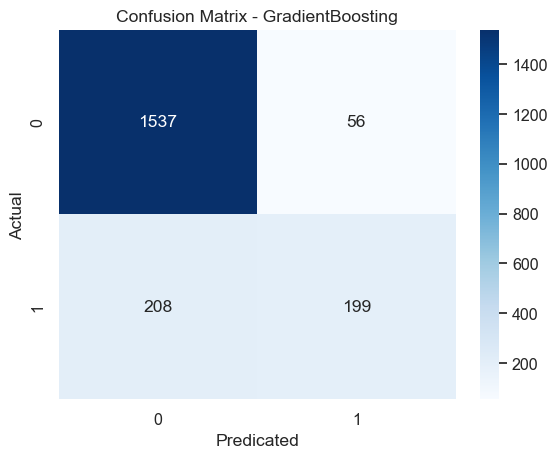

In [134]:
best_model = models[best_name]
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', best_model)])
best_pipeline.fit(X_train, y_train)

# Predictions
y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test Precision: {prec:.4f}")
print(f"Test Recall: {rec:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test ROC AUC: {roc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicated')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_name}')
plt.show()


#### Feature Importance (if applicable)

- If the choosen model supports feature importance (RandomForest/GradientBoosting), show top features

age                     0.327665
products_number         0.266459
balance_per_product     0.063396
balance                 0.056953
active_member_0         0.052653
country_Germany         0.050689
active_member_1         0.047992
Salary_balance_ratio    0.029992
estimated_salary        0.025547
credit_score            0.022685
age_group_45-54         0.020634
age_group_55-64         0.007968
gender_Female           0.006850
gender_Male             0.006532
tenure                  0.005683
country_France          0.003164
tenure_bucket_3-5       0.001564
age_group_35-44         0.001415
credit_card_1           0.000697
country_Spain           0.000577
dtype: float64

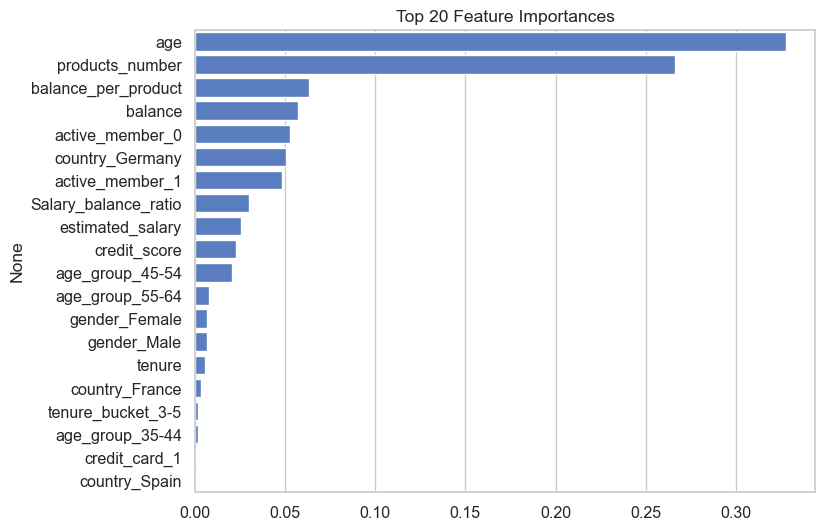

In [136]:
if hasattr(best_pipeline.named_steps['classifier'], 'feature_importances_'):
    num_feats = numeric_features
    cat_feats = list(best_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))
    feature_names = num_feats + cat_feats
    importances = best_pipeline.named_steps['classifier'].feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
    display(fi)
    plt.figure(figsize=(8,6))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title('Top 20 Feature Importances')
    plt.show()
else:
    print('Selected model does not provide feature_importances_attribute')
    

#### Save the best pipeline and preprocessing artifacts

In [137]:
joblib.dump(best_pipeline, 'best_churn_pipeline.pkl')
print('Saved pipeline: best_churn_pipeline.pkl')

Saved pipeline: best_churn_pipeline.pkl


####  Example : Predict churn for a new customer

In [139]:
sample = {
    'customer_id':373292028,
    'credit_score': 650,
    'country': 'France',
    'gender': 'Male',
    'age': 40,
    'tenure': 3,
    'balance': 50000.0,
    'products_number': 2,
    'credit_card':1,
    'active_member': 1,
    'estimated_salary': 60000.0
}

sample_df = pd.DataFrame([sample])

# apply feature engineering

sample_df['balance_per_product'] = sample_df['balance'] / (sample_df['products_number'].replace(0, np.nan))
sample_df['balance_per_product'].fillna(0, inplace=True)

sample_df['Salary_balance_ratio'] = sample_df['estimated_salary'] / (sample_df['balance'].replace(0, np.nan))
sample_df['Salary_balance_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
sample_df['Salary_balance_ratio'].fillna(sample_df['Salary_balance_ratio'].median(), inplace=True)

bins = [0,25,35,45,55,65,100]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
sample_df['age_group'] = pd.cut(sample_df['age'], bins=bins, labels=labels)

sample_df['tenure_bucket'] = pd.cut(sample_df['tenure'], bins=[-1,0,2,5,10,100], labels=['0','1-2','3-5','6-10','10+'])
sample_df['high_balance'] = (sample_df['balance'] > 50000.0).astype(int)  # can use 75th percentile of training set

# Drop id
sample_df = sample_df.drop(columns=['customer_id'])

# Predict
pred = best_pipeline.predict(sample_df)[0]
prob = best_pipeline.predict_proba(sample_df)[0,1]

print(f'Predicted churn: {pred}, probability of churn: {prob:.3f}')

Predicted churn: 0, probability of churn: 0.030
